In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
users_df = pd.read_csv("USER_TAKEHOME.csv")
products_df = pd.read_csv("PRODUCTS_TAKEHOME.csv")
transactions_df = pd.read_csv("TRANSACTION_TAKEHOME.csv")


Observing the data

In [7]:
users_df.shape

(100000, 6)

In [11]:
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [12]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [8]:
transactions_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


Looking at the structure of the data

In [21]:
print(users_df.info())
print("\n========================")
print(transactions_df.info())
print("\n========================")
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-nu

In [22]:
print(users_df.describe())
print("\n========================")
print(transactions_df.describe())
print("\n========================")
print(products_df.describe())

                              ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                       BIRTH_DATE  STATE LANGUAGE  GENDER  
count                       96325  95188    69492   94108  
unique                      54721     52        2      11  
top     1970-01-01 00:00:00.000 Z     TX       en  female  
freq                         1272   9028    63403   64240  

            BARCODE
count  4.423800e+04
mean   1.715863e+11
std    3.269219e+11
min   -1.000000e+00
25%    3.077212e+10
50%    5.210004e+10
75%    8.536765e+10
max    9.347108e+12

            BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13


Checking missing values

In [63]:
# print(users_df.isnull().sum())
# print("\n========================")
# print(transactions_df.isnull().sum())
# print("\n========================")
# print(products_df.isnull().sum())

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


Checking Duplicates

In [27]:
print(users_df.duplicated().sum())
print("\n========================")
print(transactions_df.duplicated().sum())
print("\n========================")
print(products_df.duplicated().sum())

0

171

215


Changing the required data types

In [39]:
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'],errors='coerce')
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'],errors='coerce')
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'],errors='coerce')
transactions_df['SCAN_DATE'] = pd.to_datetime(transactions_df['SCAN_DATE'],errors='coerce')



In [38]:
products_df

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [41]:
transactions_df['FINAL_SALE'].value_counts()

,count
FINAL_SALE,
,12500
1.25,1323
1.00,744
2.99,588
1.99,586
...,...
16.47,1
10.92,1
61.30,1


In [43]:
transactions_df['FINAL_SALE']

,count
FINAL_SALE,
,12500
1.25,1323
1.00,744
2.99,588
1.99,586
...,...
16.47,1
10.92,1
61.30,1


In [45]:
transactions_df['FINAL_SALE'] = (
    transactions_df['FINAL_SALE']
    .astype(str)
    .str.replace(" ", "", regex=False)
    .replace("", None)
    .astype(float)
)


In [46]:
print(users_df.info())
print("\n========================")
print(transactions_df.info())
print("\n========================")
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  

In [47]:
transactions_df['FINAL_QUANTITY'].value_counts()

,count
FINAL_QUANTITY,
1.00,35698
zero,12500
2.00,1285
3.00,184
4.00,139
...,...
6.22,1
1.22,1
1.23,1


In [49]:
transactions_df['FINAL_QUANTITY'] = (
    transactions_df['FINAL_QUANTITY']
    .astype(str)
    .str.strip()
    .replace("zero", "0")
    .replace("", None)
    .astype(float)
)


In [50]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         44238 non-null  float64            
 6   FINAL_QUANTITY  50000 non-null  float64            
 7   FINAL_SALE      37500 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(3)
memory usage: 3.1+ MB


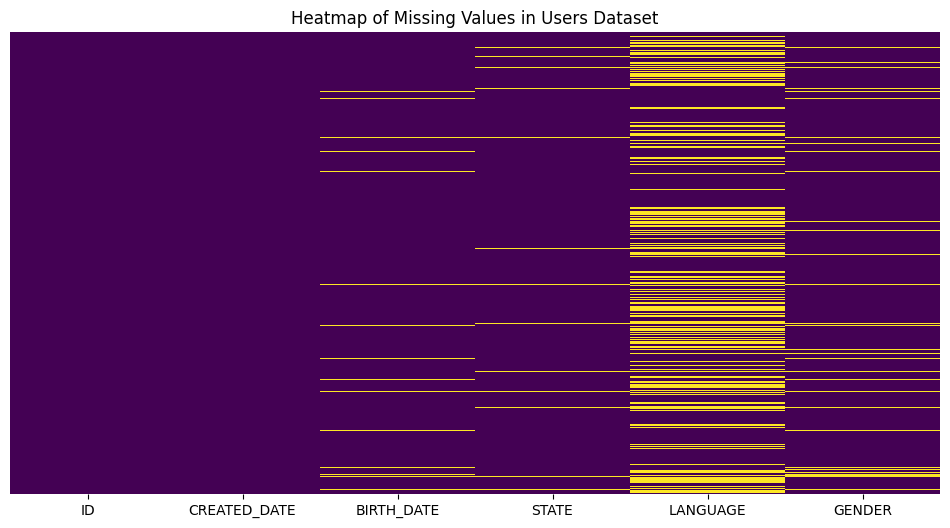

In [64]:

# # Heatmap for missing values
# plt.figure(figsize=(12, 6))
# sns.heatmap(users_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title('Heatmap of Missing Values in Users Dataset')
# plt.show()


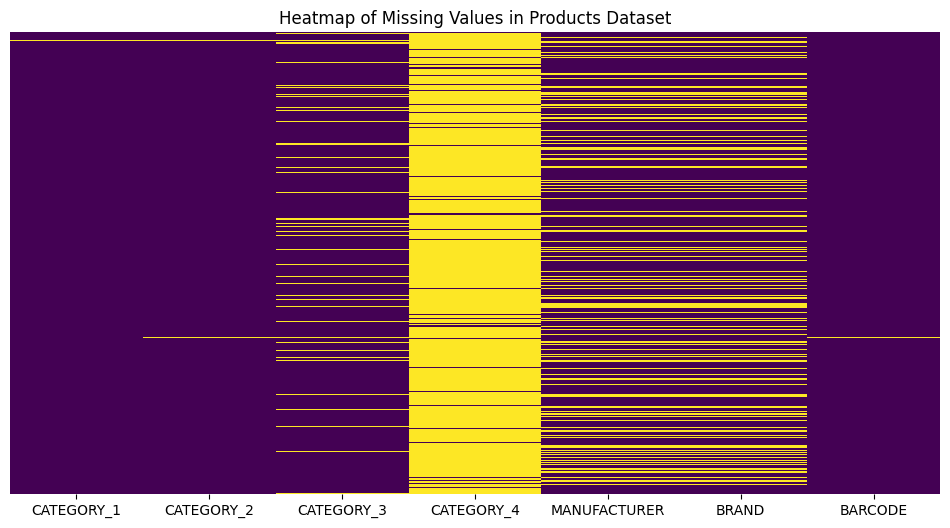

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Heatmap for missing values
# plt.figure(figsize=(12, 6))
# sns.heatmap(products_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title('Heatmap of Missing Values in Products Dataset')
# plt.show()

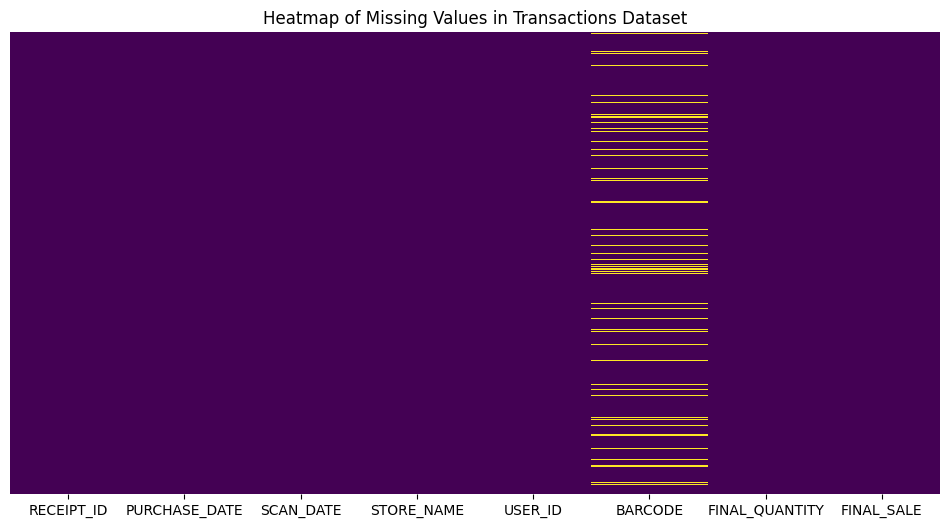

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Heatmap for missing values
# plt.figure(figsize=(12, 6))
# sns.heatmap(transactions_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title('Heatmap of Missing Values in Transactions Dataset')
# plt.show()

In [9]:
# •	Top 5 Brands by Receipts Scanned (Users 21 and Over):
from datetime import datetime




users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')


current_year = datetime.now().year
users_df['AGE'] = current_year - users_df['BIRTH_DATE'].dt.year


users_over_21 = users_df[users_df['AGE'] >= 21]


merged_data = transactions_df.merge(users_over_21, left_on='USER_ID', right_on='ID', how='inner') \
                          .merge(products_df, left_on='BARCODE', right_on='BARCODE', how='inner')


top_brands = merged_data.groupby('BRAND')['RECEIPT_ID'].count().sort_values(ascending=False).head(5)


print(top_brands)


BRAND
COCA-COLA                    628
ANNIE'S HOMEGROWN GROCERY    576
DOVE                         558
BAREFOOT                     552
ORIBE                        504
Name: RECEIPT_ID, dtype: int64


In [11]:
# •	Top 5 Brands by Sales (Users with Accounts ≥6 Months):
from datetime import datetime, timedelta


users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce').dt.tz_localize(None)
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

six_months_ago = datetime.now() - timedelta(days=6 * 30)


users_6_months = users_df[users_df['CREATED_DATE'] <= six_months_ago]


merged_data = transactions_df.merge(users_6_months, left_on='USER_ID', right_on='ID', how='inner') \
                             .merge(products_df, left_on='BARCODE', right_on='BARCODE', how='inner')


brand_sales = merged_data.groupby('BRAND')['FINAL_SALE'].sum().sort_values(ascending=False)


top_5_brands_by_sales = brand_sales.head(5)


print(top_5_brands_by_sales)


BRAND
COCA-COLA                    2592.10
ANNIE'S HOMEGROWN GROCERY    2383.92
DOVE                         2327.47
BAREFOOT                     2284.59
ORIBE                        2085.93
Name: FINAL_SALE, dtype: float64


In [12]:

merged_data = transactions_df.merge(users_df, left_on='USER_ID', right_on='ID', how='inner')


power_users = merged_data.groupby('USER_ID').agg(
    transaction_count=('RECEIPT_ID', 'count'),
    total_spent=('FINAL_SALE', 'sum')
).reset_index()


power_users = power_users.sort_values(by=['transaction_count', 'total_spent'], ascending=[False, False])


top_10_power_users = power_users.head(10)


print(top_10_power_users)


                     USER_ID  transaction_count  total_spent
51  62ffec490d9dbaff18c0a999                  6        52.28
45  62c09104baa38d1a1f6c260e                  6        20.28
33  61a58ac49c135b462ccddd1c                  6        19.92
30  610a8541ca1fab5b417b5d33                  6        17.65
4   5c366bf06d9819129dfa1118                  6        17.42
68  646bdaa67a342372c857b958                  6        15.74
20  5f6518d1bf3f5a43fdd0c9a5                  6        13.84
78  6528a0a388a3a884364d94dc                  6        12.50
19  5f64fff6dc25c93de0383513                  6         8.38
66  643059f0838dd2651fb27f50                  4        75.99
